In [1]:
%matplotlib inline
import numpy as np
import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs
import matplotlib.ticker
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.gridspec as gridspec

In [2]:
data_JSL = xr.open_dataset('/g/data/nm03/lxy581/evaluate/amp_phase/tides_025_JSL_global.nc')
lon = np.array(data_JSL['xh'])
lat = np.array(data_JSL['yh'])
am = data_JSL.amp
ph = data_JSL.phase + 180

In [3]:
topog = xr.open_dataset('/home/581/lxy581/tidal_param/MOM6-examples/ocean_only/tides_025/INPUT/ocean_topog.nc')
depth = topog.depth
depth_z = np.array(depth)
depth_z[depth_z==0]=np.nan
grid_JSL = xr.open_dataset('/g/data/nm03/lxy581/archive/tides_025_JSL/output012/ocean_static.nc')
lon = np.array(grid_JSL['geolon'])
lat = np.array(grid_JSL['geolat'])
yh, xh = grid_JSL.yh, grid_JSL.xh
depth_da = xr.Dataset(data_vars={'depth_xr': (('yh','xh'), depth_z),
                                }, 
                      coords={'lon': (('yh', 'xh'), lon),
                              'lat': (('yh', 'xh'), lat)})
land = xr.where(np.isnan(depth_da.depth_xr[:,:].rename('land')), 1, np.nan)

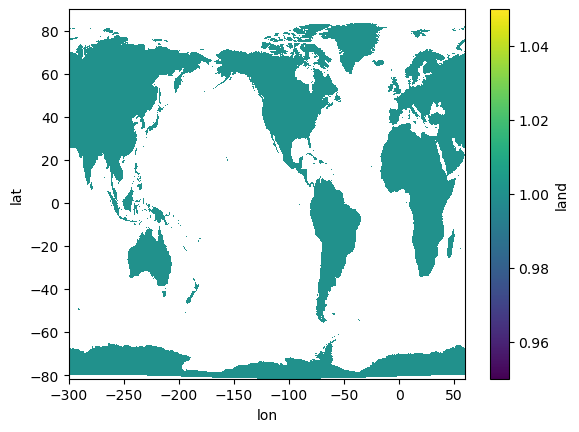

In [4]:
land.plot(x='lon',y='lat')

Start plotting...
0
Plotting amp...
Plotting phase...
1
Plotting amp...
Plotting phase...
Saving...


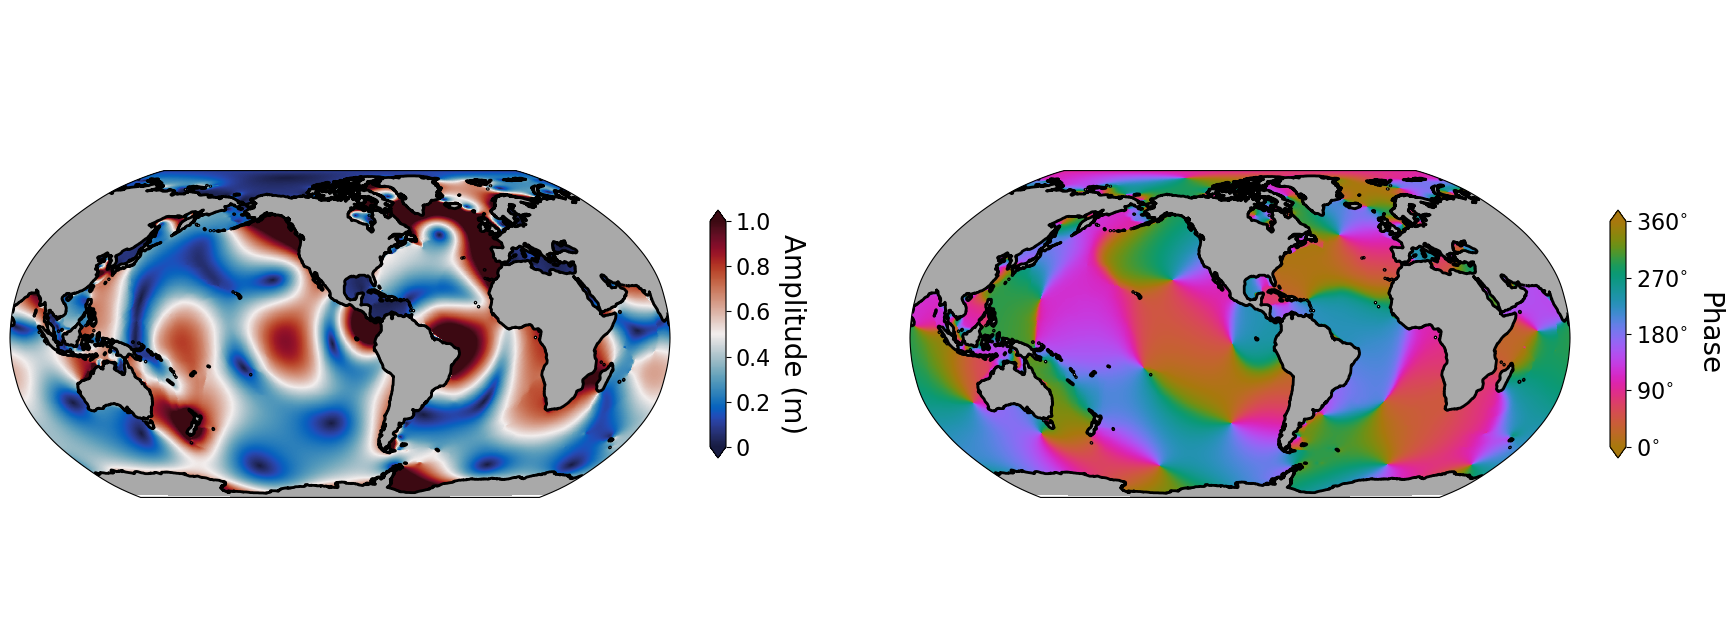

In [5]:
varlist = ['am','ph']
title   = ['amplitude (m)', 'phase (deg)']

fig = plt.figure(figsize=(20, 8))
axs = []

gridsubs = gridspec.GridSpec(1,2)
for gs in gridsubs:
    axs.append(plt.subplot(gs))

print('Start plotting...')
for I, (ax, var) in enumerate(zip(axs, varlist)):
    print(I)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

    # print('Plotting topog...')
    if I<2:
        ax = plt.axes(projection=ccrs.Robinson(central_longitude=-100))
        # Add model land mask
        land.plot.contourf(ax=ax, x='lon', y='lat', colors='darkgrey', zorder=2, transform=ccrs.PlateCarree(), add_colorbar=False)
        # Add model coastline
        land.fillna(0).plot.contour(ax=ax, x='lon', y='lat', colors='k', levels=[0, 1], transform=ccrs.PlateCarree(), add_colorbar=False, linewidths=2)

    print('Plotting amp...')
    if I==0:
        p1 = ax.pcolormesh(lon, lat, globals()[var], transform=ccrs.PlateCarree(), cmap=cm.cm.balance, vmin=0, vmax=1) #norm=LogNorm(vmin=1e-2, vmax=1e-0)
        tick_locs = np.array([0,0.2,0.4,0.6,0.8,1.0])
        tick_labels = np.array(["0","0.2","0.4","0.6","0.8","1.0"])
        ax_cb = plt.axes([0.45, 0.32, 0.008, 0.31])
        cb1 = plt.colorbar(p1, cax=ax_cb, orientation='vertical', extend='both')
        cb1.ax.set_ylabel('Amplitude (m)',fontsize=20,rotation=270,labelpad=25);
        cb1.ax.tick_params(labelsize=16)
        cb1.locator   = matplotlib.ticker.FixedLocator(tick_locs)
        cb1.formatter = matplotlib.ticker.FixedFormatter(tick_labels)
        ax.set_position([0.1,0.1,0.33,0.75])

    print('Plotting phase...')
    if I==1:
        p1 = ax.pcolormesh(lon, lat, globals()[var], transform=ccrs.PlateCarree(), cmap=cm.cm.phase, vmin=0, vmax=360)
        tick_locs = np.array([0,90,180,270,360])
        tick_labels = np.array(["0$^{\circ}$","90$^{\circ}$","180$^{\circ}$","270$^{\circ}$","360$^{\circ}$"])
        ax_cb = plt.axes([0.9, 0.32, 0.008, 0.31])
        cb1 = plt.colorbar(p1, cax=ax_cb, orientation='vertical', extend='both')
        cb1.ax.set_ylabel('Phase',fontsize=20,rotation=270,labelpad=25);
        cb1.ax.tick_params(labelsize=16)
        cb1.locator   = matplotlib.ticker.FixedLocator(tick_locs)
        cb1.formatter = matplotlib.ticker.FixedFormatter(tick_labels)
        ax.set_position([0.55,0.1,0.33,0.75])

print('Saving...')
plt.savefig('/g/data/nm03/lxy581/evaluate/amp_phase/MOM6_JSL_M2.png', dpi=100, bbox_inches='tight')